# **Relationship among body weight, blood pressure of contraceptive users**

## **Load dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

import pandas as pd

# Correct way to load the CSV file
lnguser_data = pd.read_csv('https://raw.githubusercontent.com/saifulanalyst/Biostatistics_Project1/refs/heads/main/Data/Dec_Contraceptive_Data.csv')

# Inspect the first few rows of the dataset
print(lnguser_data.head())


  v1_IDNO    v6_FaciName v7_InsertionDate v11_ClientName  v12_ClientAge  \
0   MF046          MFSTC        12-Apr-22         Fariha             27   
1   MC016          MCHTI        17-Apr-22           Irin             19   
2   MC015          MCHTI        17-Apr-22      Doli Rani             27   
3   OG023  OGSB Hospital        22-Jun-22        Shamima             32   
4   MF032          MFSTC         9-Mar-22           Moni             36   

   Age_CompletedClient v19_ClientsDist     v20_ClientsUpaz v22_UsingFPmethod  \
0                 27.0  Dhaka District  Mirpur Model Thana               Yes   
1                 19.0  Dhaka District                                   Yes   
2                 27.0  Dhaka District                                   Yes   
3                 32.0  Dhaka District  Mirpur Model Thana               Yes   
4                 36.0  Dhaka District  Mirpur Model Thana               Yes   

  v23_IfYesMethod  v24_ReasonsForLNGmethod  Contra_type  v51_Weight 

## Mean and standard **deviation**

In [2]:
# 2c: Mean and standard deviation
print("Mean of Client Age:", lnguser_data["v12_ClientAge"].mean())
print("Standard Deviation of Client Age:", lnguser_data["v12_ClientAge"].std())

print("Mean of Mean BP:", lnguser_data["Mean_BP"].mean())
print("Standard Deviation of Mean BP:", lnguser_data["Mean_BP"].std())

print("Mean of Weight:", lnguser_data["v51_Weight"].mean())
print("Standard Deviation of Weight:", lnguser_data["v51_Weight"].std())

Mean of Client Age: 29.38235294117647
Standard Deviation of Client Age: 6.894877207682162
Mean of Mean BP: 88.46470588235294
Standard Deviation of Mean BP: 6.026709895249949
Mean of Weight: 58.5
Standard Deviation of Weight: 12.012444237874627


## Proportion of Contraceptive **use**

In [3]:
# Counts and proportions of contraceptive types
hormon_counts = lnguser_data["Contra_type"].value_counts()
hormon_proportions = lnguser_data["Contra_type"].value_counts(normalize=True) * 100
print("Contraceptive Type Counts:")
print(hormon_counts)
print("Contraceptive Type Proportions:")
print(hormon_proportions)

Contraceptive Type Counts:
Contra_type
1    102
0     68
Name: count, dtype: int64
Contraceptive Type Proportions:
Contra_type
1    60.0
0    40.0
Name: proportion, dtype: float64


# **Visualization**

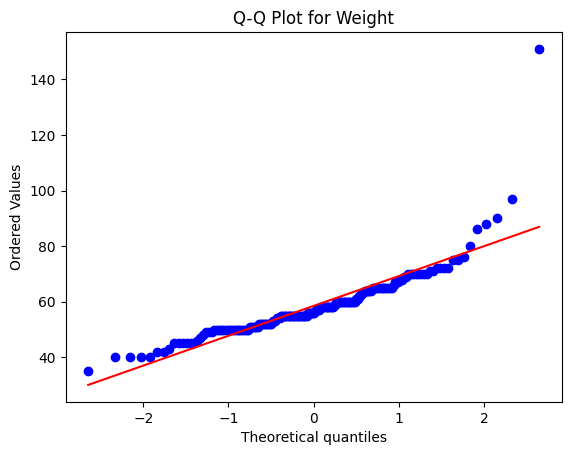

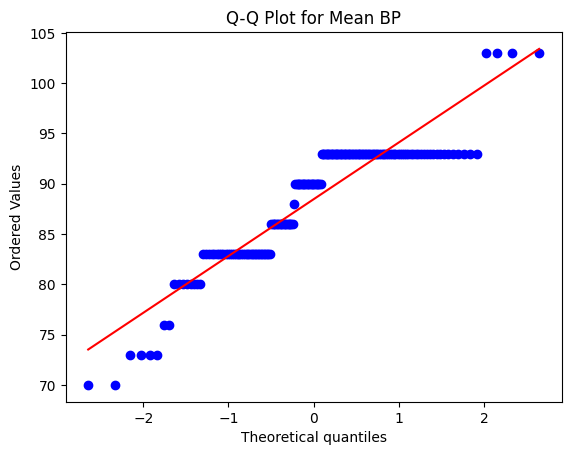

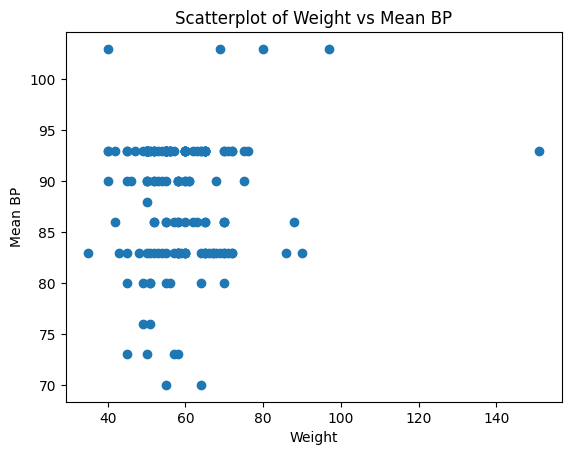

In [4]:
# Q-Q plots
# For Weight
stats.probplot(lnguser_data["v51_Weight"], dist="norm", plot=plt)
plt.title("Q-Q Plot for Weight")
plt.show()

# For Mean BP
stats.probplot(lnguser_data["Mean_BP"], dist="norm", plot=plt)
plt.title("Q-Q Plot for Mean BP")
plt.show()

# Scatterplot
plt.scatter(lnguser_data["v51_Weight"], lnguser_data["Mean_BP"])
plt.title("Scatterplot of Weight vs Mean BP")
plt.xlabel("Weight")
plt.ylabel("Mean BP")
plt.show()

# **Correlation**

In [5]:
# Pearson Correlation
cor_result = stats.pearsonr(lnguser_data["v51_Weight"], lnguser_data["Mean_BP"])
print("Pearson Correlation Results:")
print("Correlation Coefficient:", cor_result[0])
print("P-value:", cor_result[1])


Pearson Correlation Results:
Correlation Coefficient: 0.04474924863577295
P-value: 0.5622892995405229


# ** Two Independent Sample T-Test**

In [6]:
# Two Independent Samples t-test
# Group-wise statistics
group_stats = lnguser_data.groupby("Contra_type")["Mean_BP"].agg(["mean", "std"])
print("Group-wise Statistics:")
print(group_stats)

Group-wise Statistics:
                  mean       std
Contra_type                     
0            88.588235  5.201134
1            88.382353  6.543146


## **Variance Test or F Test**

In [7]:
# Variance test (F-test)
var_test_result = stats.levene(
    lnguser_data[lnguser_data["Contra_type"] == "Type1"]["Mean_BP"],
    lnguser_data[lnguser_data["Contra_type"] == "Type2"]["Mean_BP"]
)
print("Variance Test (Levene's Test) Results:")
print("Test Statistic:", var_test_result.statistic)
print("P-value:", var_test_result.pvalue)

Variance Test (Levene's Test) Results:
Test Statistic: nan
P-value: nan


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


## **Independent T-Test**

In [8]:
# Independent t-test
t_test_result = stats.ttest_ind(
    lnguser_data[lnguser_data["Contra_type"] == "Type1"]["Mean_BP"],
    lnguser_data[lnguser_data["Contra_type"] == "Type2"]["Mean_BP"],
    equal_var=True  # Assuming equal variances based on the F-test
)
print("Independent t-test Results:")
print("Test Statistic:", t_test_result.statistic)
print("P-value:", t_test_result.pvalue)

Independent t-test Results:
Test Statistic: nan
P-value: nan


## **Linear Regression**

In [10]:
# Linear regression
# Convert Contra_type to categorical
lnguser_data["Contra_typeCate"] = pd.Categorical(lnguser_data["Contra_type"])

## **Fit In Linear Regression Model**

In [11]:
# Fit the linear regression model
model = ols("Mean_BP ~ v51_Weight + Contra_typeCate", data=lnguser_data).fit()
print("Linear Regression Results:")
print(model.summary())

Linear Regression Results:
                            OLS Regression Results                            
Dep. Variable:                Mean_BP   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.1957
Date:                Mon, 10 Feb 2025   Prob (F-statistic):              0.822
Time:                        18:36:56   Log-Likelihood:                -545.87
No. Observations:                 170   AIC:                             1098.
Df Residuals:                     167   BIC:                             1107.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Inter

## **Anova**

In [12]:
# ANOVA for the regression model
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA Table:")
print(anova_table)

ANOVA Table:
                      sum_sq     df         F    PR(>F)
Contra_typeCate     2.060400    1.0  0.056187  0.812918
v51_Weight         12.622881    1.0  0.344227  0.558192
Residual         6123.935942  167.0       NaN       NaN


## **Residual Plot**

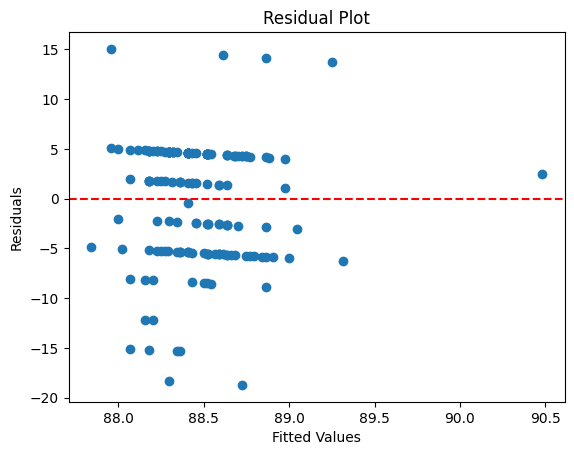

In [13]:
# Residual plot
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(y=0, color="red", linestyle="--")
plt.title("Residual Plot")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()